# e-Mail Spam Classifier

A spam filter is a program used to detect unsolicited, unwanted and virus-infected emails and prevent those messages from getting to a user's inbox.

## Process

1. EDA
2. Text Processing 
2. Data Preprocessing and Data Visualisation
3. Model Building
4. Improvements
5. Deploy

## Importing dependencies

In [1]:
import pandas as pd
import numpy as np

In [2]:
mail_data = pd.read_csv('~/Desktop/Datasets/mail_data.csv')

In [3]:
mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
mail = mail_data
mail

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mail.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


# Exploratory Data Analysis (EDA)

In [7]:
mail.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
mail.shape

(5572, 2)

shape gives the total number of rows and columns in the  dataset

In [10]:
mail.size

11144

In [11]:
mail['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [12]:
mail['Message'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [13]:
mail['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [14]:
mail['Message'].value_counts()

Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
                                                                                                                                                            ..
I gotta collect da car at 6 lei.              

In [15]:
mail.isnull().sum()

Category    0
Message     0
dtype: int64

##### NO NULL VALUES 

In [16]:
mail.iloc[0].Category

'ham'

In [17]:
mail.iloc[4786].Category

'spam'

In [18]:
mail.iloc[0].Message

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [19]:
mail.iloc[4786].Message

'Urgent -call 09066649731from Landline. Your complimentary 4* Ibiza Holiday or £10,000 cash await collection SAE T&Cs PO BOX 434 SK3 8WP 150ppm 18+'

### Renaming our Columns

In [20]:
mail.rename(columns={'Category':'target_values','Message':'text'},inplace=True)
mail.head(2)

,target_values,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


Now let's convert hams into 0 and spams into 1

In [21]:
from sklearn.preprocessing import LabelEncoder
text_encoding = LabelEncoder()
mail['target_values'] = text_encoding.fit_transform(mail['target_values'])
mail.head()

,target_values,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### LabelEncoder - Encode target labels with value between 0 and n_classes-1.
#### ham - 0 and spam - 1

In [22]:
mail.iloc[0].target_values

0

In [23]:
mail.iloc[5567].target_values

1

0 --> ham

1 --> spam

In [24]:
mail.isnull().sum()

target_values    0
text             0
dtype: int64

#### Check for duplicates

In [25]:
mail.duplicated().sum()

415

#### Remove Duplicates

In [26]:
mail = mail.drop_duplicates(keep='first')

In [27]:
mail.duplicated().sum()

0

#### Removed all the duplicates

In [28]:
mail.shape

(5157, 2)

Before the shape was (5572 rows × 2 columns) and after removing all the duplicates shape is (5157 rows × 2 columns)

In [29]:
mail['target_values'].value_counts()

0    4516
1     641
Name: target_values, dtype: int64

# Data Visualisation

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


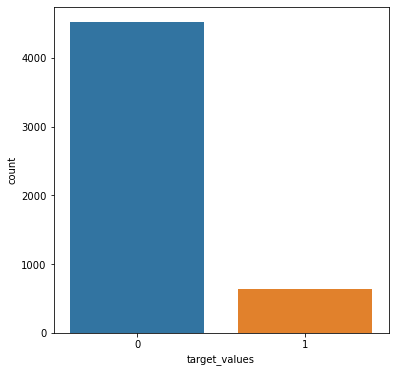

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.countplot(mail['target_values'])
plt.show()

In [31]:
mail['target_values'].value_counts()

0    4516
1     641
Name: target_values, dtype: int64

In [32]:
mail['text'].value_counts()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                               1
LOL what happens in Vegas stays in vegas                                                                                                                      1
Oh really?? Did you make it on air? What's your talent?                                                                                                       1
Senthil group company Apnt 5pm.                                                                                                                               1
Why i come in between you people                                                                                                                              1
                                                                                                                                                             ..
Buy Space Invaders 4 a chance 2 win orig

### Check whether data is balanced or not 

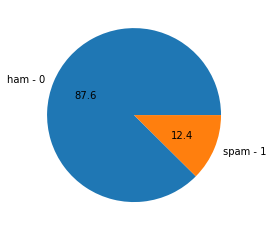

In [33]:
plt.pie(mail['target_values'].value_counts(), labels=['ham - 0','spam - 1'],autopct="%0.1f")
plt.show()

ham --> 87.6%

spam --> 12.4%

Data is not balanced 

We can balance the data using Natural language Processing

### Using NLTK 

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nitinbaradhwaj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Punkt - This tokenizer divides a text into a list of sentences
by using an unsupervised algorithm to build a model for abbreviation
words, collocations, and words that start sentences. 


As we are using a large plain text data set so it is necessary to use punkt

#### We are going to create 3 columns here (total_chars,total_words,total_sentences)
#### This to get total number of aplhabets, words, sentences used in our dataset

In [35]:
#No of words
mail['total_chars'] = mail['text'].apply(len)
#No of words
mail['total_words'] = mail['text'].apply(lambda m:len(nltk.word_tokenize(m)))
#No of Sentences
mail['total_sentences'] = mail['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
mail.head(3)

/var/folders/wh/bhy3txbx6_n5s5f7kd53btkc0000gn/T/ipykernel_7801/2941569230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail['total_chars'] = mail['text'].apply(len)
/var/folders/wh/bhy3txbx6_n5s5f7kd53btkc0000gn/T/ipykernel_7801/2941569230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail['total_words'] = mail['text'].apply(lambda m:len(nltk.word_tokenize(m)))
/var/folders/wh/bhy3txbx6_n5s5f7kd53btkc0000gn/T/ipykernel_7801/2941569230.py:6: SettingWithCopyWarning: 
A value is trying to be set 

,target_values,text,total_chars,total_words,total_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [36]:
mail.describe()

,target_values,total_chars,total_words,total_sentences
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.557882,1.950553
std,0.329952,58.382922,13.406024,1.362981
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [37]:
mail[['total_chars','total_words','total_sentences']].describe()

,total_chars,total_words,total_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


For ham

In [38]:
mail[mail['target_values'] == 0][['total_chars','total_words','total_sentences']].describe()

,total_chars,total_words,total_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


For spam

In [39]:
mail[mail['target_values'] == 1][['total_chars','total_words','total_sentences']].describe()

,total_chars,total_words,total_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


Now data is balanced

# Data Visualisation

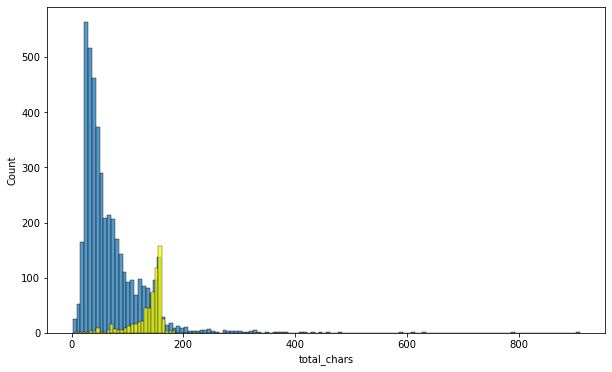

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(mail[mail['target_values'] == 0]['total_chars'])
sns.histplot(mail[mail['target_values'] == 1]['total_chars'],color='yellow')
plt.show()

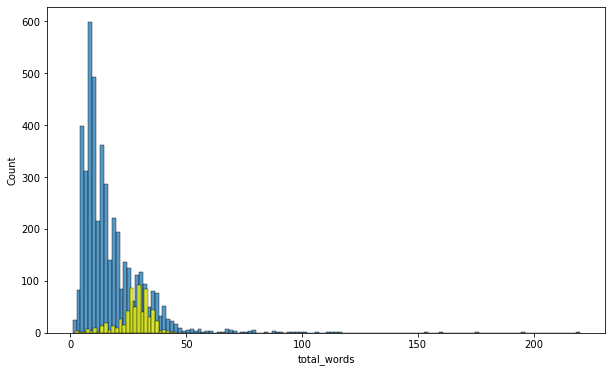

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(mail[mail['target_values'] == 0]['total_words'])
sns.histplot(mail[mail['target_values'] == 1]['total_words'],color='yellow')
plt.show()

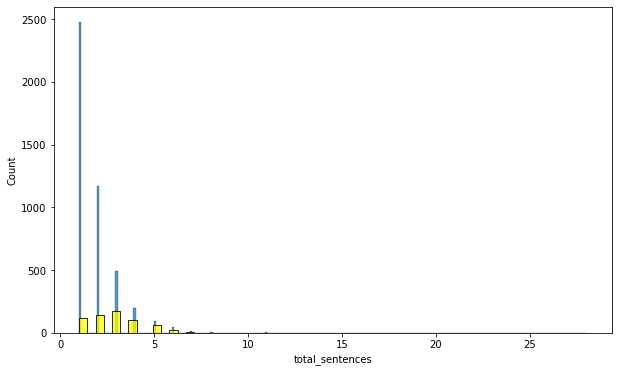

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(mail[mail['target_values'] == 0]['total_sentences'])
sns.histplot(mail[mail['target_values'] == 1]['total_sentences'],color='yellow')
plt.show()

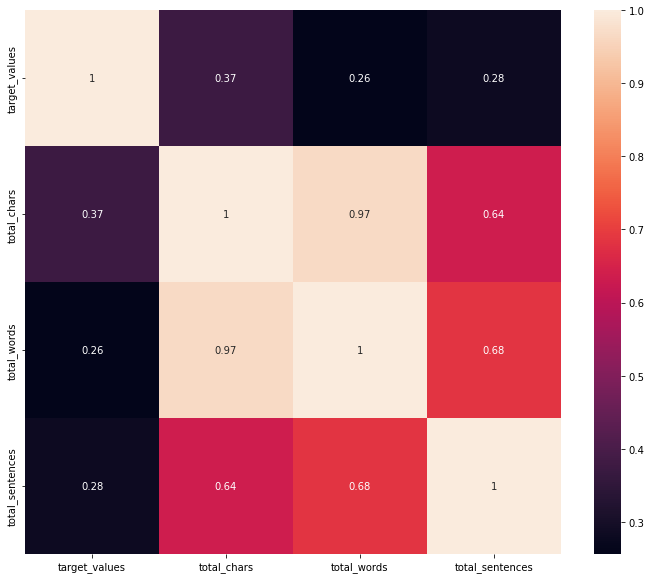

In [43]:
plt.figure(figsize=(12,10))
sns.heatmap(mail.corr(),annot=True)
plt.show()

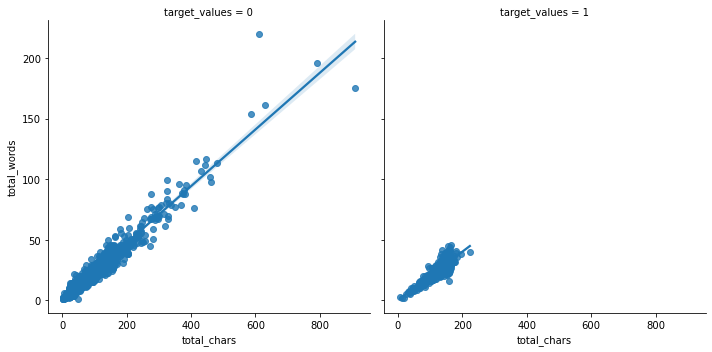

In [44]:
sns.lmplot(data=mail, x="total_chars", y="total_words", col="target_values")
plt.show()

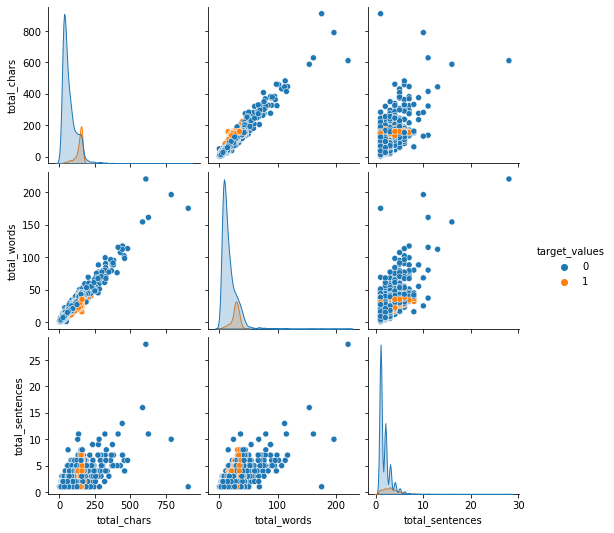

In [45]:
sns.pairplot(mail,hue='target_values')
plt.show()

A pairplot plot a pairwise relationships in a dataset. 

# Data Preprocessing

In [46]:
from nltk.corpus import stopwords

import string
#stopwords.words('english')

In [47]:
from nltk.stem.porter import PorterStemmer
port_stem = PorterStemmer()
port_stem.stem('laughing')

'laugh'

In [48]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
def transforming(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    random = []
    for x in text:
        if x.isalnum():
            random.append(x)

    text = random[:]
    #need clone the data
    random.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            random.append(i)
    
    text = random[:]
    random.clear()
    
    for i in text:
        random.append(port_stem.stem(i))
            
    return " ".join(random)

In [50]:
transforming('HIIi how ARe you bRo 19?')

'hiii bro 19'

In [51]:
mail['text']
transforming('Go until jurong point, crazy.. Available only')

'go jurong point crazi avail'

In [52]:
mail['text'].apply(transforming)
mail['transformed'] = mail['text'].apply(transforming)

/var/folders/wh/bhy3txbx6_n5s5f7kd53btkc0000gn/T/ipykernel_7801/2463096599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail['transformed'] = mail['text'].apply(transforming)


In [53]:
mail.head(2)

,target_values,text,total_chars,total_words,total_sentences,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [54]:
from wordcloud import WordCloud
word_count = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

### Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. 

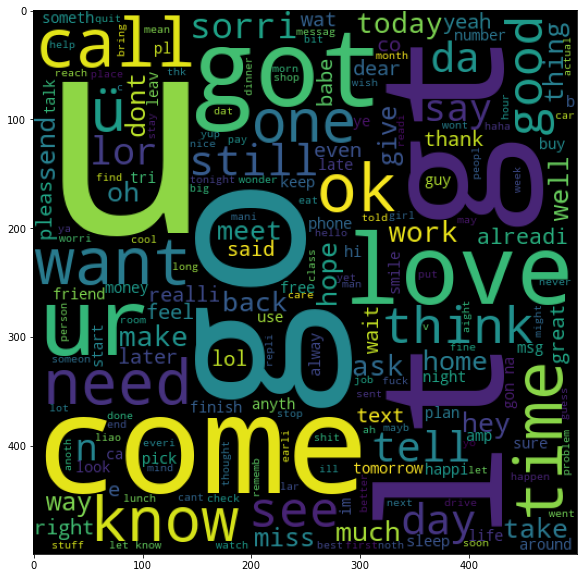

In [55]:
ham_word_count = word_count.generate(mail[mail['target_values'] == 0]['transformed'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.imshow(ham_word_count)
plt.show()

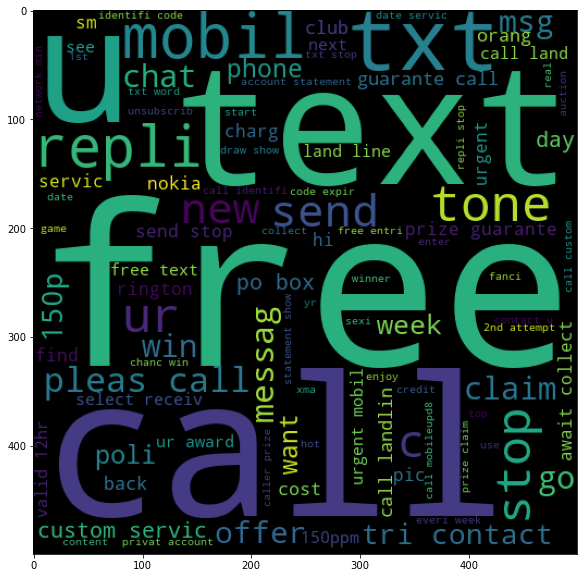

In [56]:
spam_word_count = word_count.generate(mail[mail['target_values'] == 1]['transformed'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.imshow(spam_word_count)
plt.show()

The above word cloud has been generated using mail_data.csv file in the dataset. 

In [57]:
mail.head(2)

,target_values,text,total_chars,total_words,total_sentences,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [58]:
from collections import Counter


#for Spsam
no_spam_corpus = []
for message in mail[mail['target_values'] == 1]['transformed'].tolist():
    for word_cnt in message.split():
        no_spam_corpus.append(word_cnt)
      
    
#for Ham
no_ham_corpus = []
for message in mail[mail['target_values'] == 0]['transformed'].tolist():
    for word_cnt in message.split():
        no_ham_corpus.append(word_cnt)


In [59]:
len(no_spam_corpus)

9781

In [60]:
len(no_ham_corpus)      

35930

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


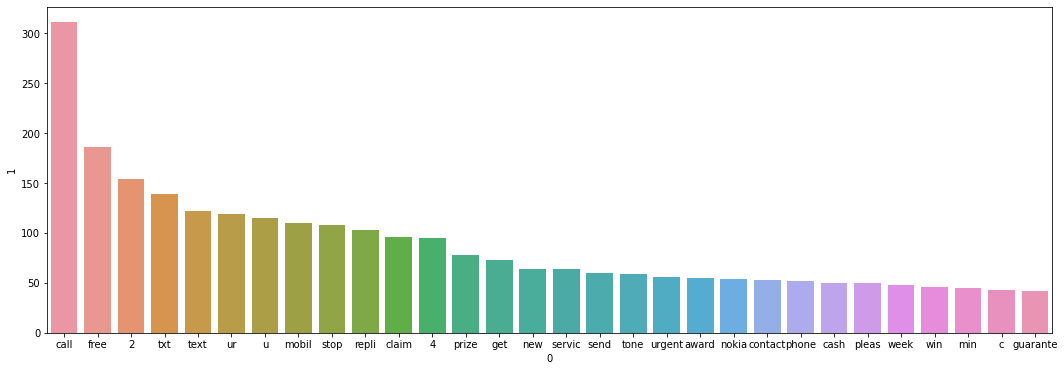

In [61]:
plt.figure(figsize=(18,6))
sns.barplot(pd.DataFrame(Counter(no_spam_corpus).most_common(30))[0],pd.DataFrame(Counter(no_spam_corpus).most_common(30))[1])
plt.xticks(rotation='horizontal')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


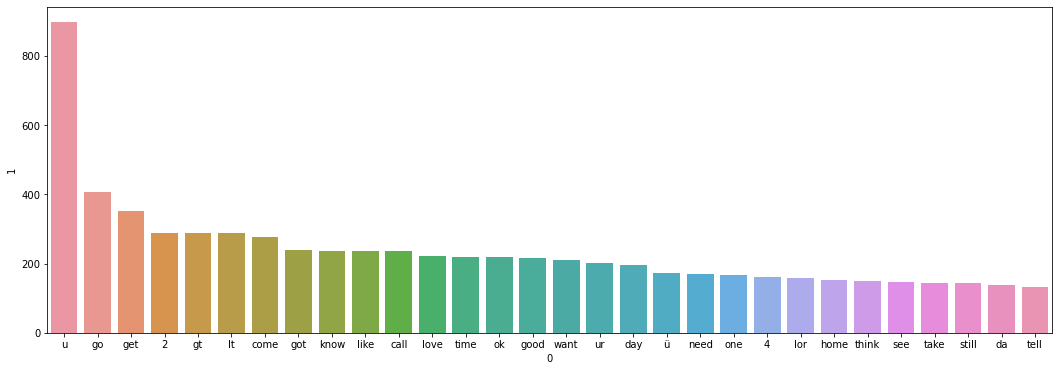

In [62]:
plt.figure(figsize=(18,6))
sns.barplot(pd.DataFrame(Counter(no_ham_corpus).most_common(30))[0],pd.DataFrame(Counter(no_ham_corpus).most_common(30))[1])
plt.xticks(rotation='horizontal')
plt.show()

# Model Building 

In [63]:
mail.head(2)

,target_values,text,total_chars,total_words,total_sentences,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=3000)

Using tf-idf ( "term frequency–inverse document frequency" )

In [65]:
X = tf_idf.fit_transform(mail['transformed']).toarray()

In [66]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
X.shape

(5157, 3000)

In [68]:
mail.shape

(5157, 6)

In [69]:
Y = mail['target_values'].values

In [70]:
Y

array([0, 0, 1, ..., 0, 0, 0])

## Splitting into Train and Test Data

In [71]:
from sklearn.model_selection import train_test_split
X_mailtrain, X_mailtest, Y_mailtrain, Y_mailtest = train_test_split(X,Y,test_size=0.2,random_state=2)

In [72]:
X_mailtrain.shape

(4125, 3000)

In [73]:
Y_mailtrain.shape

(4125,)

In [74]:
X_mailtest.shape

(1032, 3000)

In [75]:
Y_mailtest.shape

(1032,)

Naive Bayes is the best algorithmn for text classification

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,CategoricalNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
cnb = CategoricalNB()

Using GaussianNB

In [77]:
gnb.fit(X_mailtrain,Y_mailtrain)
pred_1 = gnb.predict(X_mailtest)
gnb_acc = (accuracy_score(Y_mailtest,pred_1))
gnb_psc = (precision_score(Y_mailtest,pred_1))
print("Accuracy Score is:",gnb_acc*100)
print("Precision Score is:",gnb_psc*100)
gnb_matrix = (confusion_matrix(Y_mailtest,pred_1))
print("Confuison Matrix is:",gnb_matrix)

Accuracy Score is: 86.62790697674419
Precision Score is: 47.61904761904761
Confuison Matrix is: [[784 121]
 [ 17 110]]


Using MultinomialNB

In [78]:
mnb.fit(X_mailtrain,Y_mailtrain)
pred_2 = mnb.predict(X_mailtest)
mnb_acc = (accuracy_score(Y_mailtest,pred_2))
mnb_psc = (precision_score(Y_mailtest,pred_2))
print("Accuracy Score is:",mnb_acc*100)
print("Precision Score is:",mnb_psc*100)
mnb_matrix = (confusion_matrix(Y_mailtest,pred_2))
print("Confuison Matrix is:",mnb_matrix)

Accuracy Score is: 97.09302325581395
Precision Score is: 100.0
Confuison Matrix is: [[905   0]
 [ 30  97]]


Using BernoulliNB

In [79]:
bnb.fit(X_mailtrain,Y_mailtrain)
pred_3 = bnb.predict(X_mailtest)
bnb_acc = (accuracy_score(Y_mailtest,pred_3))
bnb_psc = (precision_score(Y_mailtest,pred_3))
print("Accuracy Score is:",bnb_acc*100)
print("Precision Score is:",bnb_psc*100)
bnb_matrix = (confusion_matrix(Y_mailtest,pred_3))
print("Confuison Matrix is:",bnb_matrix)

Accuracy Score is: 98.35271317829456
Precision Score is: 98.24561403508771
Confuison Matrix is: [[903   2]
 [ 15 112]]


### Using Multinomial NaÏve Bayes with other Machine Learning Algorithms 

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [94]:
classifiers = {
    'Support Vector Machine' : svc,
    'K-Nearest Neighbors' : knc, 
    'Naive Bayes': mnb, 
    'Decision Tree': dtc, 
    'Logistic Regression': lrc, 
    'Random Forest': rfc, 
    'AdaBoost': abc, 
    'Bagging Classifier': bc, 
    'Extra Trees Classifier': etc,
    'Gradient Boosting Classifier':gbdt
}

Training data with different Algorithms 

In [95]:
def training_data(classifiers,X_mailtrain,Y_mailtrain,X_mailtest,Y_mailtest):
    classifiers.fit(X_mailtrain,Y_mailtrain)
    pred = classifiers.predict(X_mailtest)
    accuracy = accuracy_score(Y_mailtest,pred)
    precision = precision_score(Y_mailtest,pred)
    
    return accuracy,precision

training_data(svc,X_mailtrain,Y_mailtrain,X_mailtest,Y_mailtest)

(0.9757751937984496, 0.9811320754716981)

In [96]:
training_data(lrc,X_mailtrain,Y_mailtrain,X_mailtest,Y_mailtest)

(0.9583333333333334, 0.9375)

In [97]:
training_data(mnb,X_mailtrain,Y_mailtrain,X_mailtest,Y_mailtest)

(0.9709302325581395, 1.0)

In [100]:
accuracy_scores = []
precision_scores = []

for name,clf in classifiers.items():
    
    current_accuracy,current_precision = training_data(clf,X_mailtrain,Y_mailtrain,X_mailtest,Y_mailtest)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Support Vector Machine
Accuracy -  0.9757751937984496
Precision -  0.9811320754716981
For  K-Nearest Neighbors
Accuracy -  0.9127906976744186
Precision -  1.0
For  Naive Bayes
Accuracy -  0.9709302325581395
Precision -  1.0
For  Decision Tree
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  Logistic Regression
Accuracy -  0.9583333333333334
Precision -  0.9375
For  Random Forest
Accuracy -  0.9738372093023255
Precision -  1.0
For  AdaBoost
Accuracy -  0.9660852713178295
Precision -  0.9423076923076923
For  Bagging Classifier
Accuracy -  0.9612403100775194
Precision -  0.8918918918918919
For  Extra Trees Classifier
Accuracy -  0.9777131782945736
Precision -  0.9905660377358491
For  Gradient Boosting Classifier
Accuracy -  0.9554263565891473
Precision -  0.9764705882352941


In [102]:
performance_pres = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_pres

,Algorithm,Accuracy,Precision
1,K-Nearest Neighbors,0.912791,1.000000
2,Naive Bayes,0.970930,1.000000
5,Random Forest,0.973837,1.000000
8,Extra Trees Classifier,0.977713,0.990566
0,Support Vector Machine,0.975775,0.981132
9,Gradient Boosting Classifier,0.955426,0.976471
6,AdaBoost,0.966085,0.942308
4,Logistic Regression,0.958333,0.937500
7,Bagging Classifier,0.961240,0.891892
3,Decision Tree,0.936047,0.821053


In [103]:
performance_acc = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_acc

,Algorithm,Accuracy,Precision
8,Extra Trees Classifier,0.977713,0.990566
0,Support Vector Machine,0.975775,0.981132
5,Random Forest,0.973837,1.000000
2,Naive Bayes,0.970930,1.000000
6,AdaBoost,0.966085,0.942308
7,Bagging Classifier,0.961240,0.891892
4,Logistic Regression,0.958333,0.937500
9,Gradient Boosting Classifier,0.955426,0.976471
3,Decision Tree,0.936047,0.821053
1,K-Nearest Neighbors,0.912791,1.000000


In [105]:
new_data = pd.melt(performance_pres, id_vars = "Algorithm")
new_data

,Algorithm,variable,value
0,K-Nearest Neighbors,Accuracy,0.912791
1,Naive Bayes,Accuracy,0.970930
2,Random Forest,Accuracy,0.973837
3,Extra Trees Classifier,Accuracy,0.977713
4,Support Vector Machine,Accuracy,0.975775
5,Gradient Boosting Classifier,Accuracy,0.955426
6,AdaBoost,Accuracy,0.966085
7,Logistic Regression,Accuracy,0.958333
8,Bagging Classifier,Accuracy,0.961240
9,Decision Tree,Accuracy,0.936047


<Figure size 720x720 with 0 Axes>

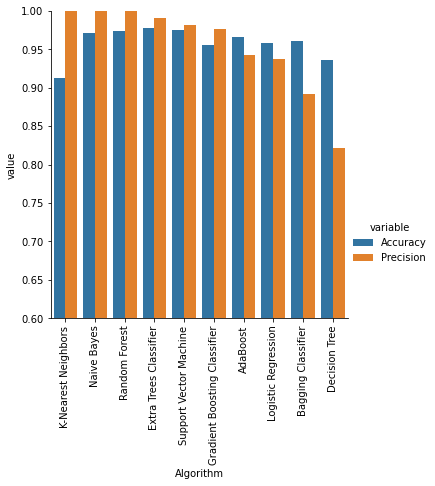

In [106]:
plt.figure(figsize=(10,10))
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=new_data, kind='bar',height=5)
plt.ylim(0.6,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [108]:
new_data1 = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [109]:
new_data1 = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [113]:
new_data2 = performance_pres.merge(new_data1,on='Algorithm')
new_data3 = new_data2.merge(new_data1,on='Algorithm')
new_data1 = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [114]:
performance_pres

,Algorithm,Accuracy,Precision
1,K-Nearest Neighbors,0.912791,1.000000
2,Naive Bayes,0.970930,1.000000
5,Random Forest,0.973837,1.000000
8,Extra Trees Classifier,0.977713,0.990566
0,Support Vector Machine,0.975775,0.981132
9,Gradient Boosting Classifier,0.955426,0.976471
6,AdaBoost,0.966085,0.942308
4,Logistic Regression,0.958333,0.937500
7,Bagging Classifier,0.961240,0.891892
3,Decision Tree,0.936047,0.821053


In [115]:
performance_acc

,Algorithm,Accuracy,Precision
8,Extra Trees Classifier,0.977713,0.990566
0,Support Vector Machine,0.975775,0.981132
5,Random Forest,0.973837,1.000000
2,Naive Bayes,0.970930,1.000000
6,AdaBoost,0.966085,0.942308
7,Bagging Classifier,0.961240,0.891892
4,Logistic Regression,0.958333,0.937500
9,Gradient Boosting Classifier,0.955426,0.976471
3,Decision Tree,0.936047,0.821053
1,K-Nearest Neighbors,0.912791,1.000000


In [116]:
new_data3.merge(new_data1, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,K-Nearest Neighbors,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000
1,Naive Bayes,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000
2,Random Forest,0.973837,1.000000,0.973837,1.000000,0.973837,1.000000,0.973837,1.000000
3,Extra Trees Classifier,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566
4,Support Vector Machine,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132
5,Gradient Boosting Classifier,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471
6,AdaBoost,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308
7,Logistic Regression,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500
8,Bagging Classifier,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892
9,Decision Tree,0.936047,0.821053,0.936047,0.821053,0.936047,0.821053,0.936047,0.821053


In [117]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc), ('rf', rfc)],voting='soft')
voting.fit(X_mailtrain,Y_mailtrain)
final_pred = voting.predict(X_mailtest)
print("Accuracy",accuracy_score(Y_mailtest,final_pred))
print("Precision",precision_score(Y_mailtest,final_pred))

Accuracy 0.9825581395348837
Precision 1.0


In [118]:
estimation=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimation=RandomForestClassifier()
classify = StackingClassifier(estimators=estimation, final_estimator=final_estimation)
classify.fit(X_mailtrain,Y_mailtrain)
predict_final = classify.predict(X_mailtest)
print("Accuracy",accuracy_score(Y_mailtest,predict_final))
print("Precision",precision_score(Y_mailtest,predict_final))

Accuracy 0.9825581395348837
Precision 0.9823008849557522


In [119]:
import pickle
pickle.dump(tf_idf,open('spam.pkl','wb'))
pickle.dump(mnb,open('spammodel.pkl','wb'))